

```
# This is formatted as code
```

## Survival Guide

1. Always start by pressing the drop down arrow by Connect on the top right, and "Connect to a hosted runtime: T4"
2. From that dropdown, "View Resources" to check you have a GPU and monitor memory
3. If things go awry, Runtime >> Disconnect and Delete Runtime, Connect again, and then run cells from the top
4. Always run the pip installs! Ignore pip dependency errors.

Runtime >> Restart session: this restarts the Python Kernel, but pip packages remain installed and the disk remains the same.

Runtime >> Disconnect and delete session. This wipes everything.

In [1]:
!pip install -q --upgrade transformers==4.56.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 44.5 MB/s eta 0:00:00


In [2]:
!pip install -q  -U accelerate bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 MB 15.5 MB/s eta 0:00:00


In [3]:

!pip install -q --upgrade datasets==3.6.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 16.5 MB/s eta 0:00:00


In [4]:
# Let's check the GPU - it should be a Tesla T4

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)
  if gpu_info.find('Tesla T4') >= 0:
    print("Success - Connected to a T4")
  else:
    print("NOT CONNECTED TO A T4")

Fri Jan  9 16:44:39 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Connecting Hugging Face

You'll need to log in to the HuggingFace hub if you've not done so before.

1. If you haven't already done so, create a **free** HuggingFace account at https://huggingface.co and navigate to Settings from the user menu on the top right. Then select Access Tokens, then click the Create new token button near the top right. THEN be sure to click the button "Write" under 'Token type'.

  **IMPORTANT** when you create your HuggingFace Access Token, please be sure to select WRITE permissions for your key by clicking on the "Write" button, otherwise you may get problems later. Not "fine-grained" but "Write".

  In the field "Token name" you can put anything you want, like "My HF Token". This field is just for your reference.

  Then press "Create token" and then copy it into your clipboard, and keep a record of your token! It should start "hf_..."

2. Back here in colab, press the "key" icon on the side panel to the left, and add a new secret:  
  In the name field put `HF_TOKEN`  
  In the value field put your actual access token: `hf_...`  
  Ensure the notebook access switch is turned ON.

3. Execute the cell below to log in. You'll need to do this on each of your colabs. It's a really useful way to manage your secrets without needing to type them into colab.

In [5]:
from huggingface_hub import login
from google.colab import userdata


hf_token = userdata.get('HF_TOKEN')
login(hf_token, add_to_git_credential=True)

In [6]:
from transformers import AutoTokenizer, AutoModelForCausalLM,BitsAndBytesConfig


In [4]:
# Load tokenizer and model automatically
tokenizer = AutoTokenizer.from_pretrained("gpt2")
model = AutoModelForCausalLM.from_pretrained("gpt2")

# Encode and generate
inputs = tokenizer("Hello world, How are you", return_tensors="pt")
outputs = model.generate(**inputs, max_length=30)

print(tokenizer.decode(outputs[0]))


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Hello world, How are you?

I'm a little bit of a nerd. I'm a little bit of a nerd. I'm a


Sentiment Classification Task

In [ ]:
from transformers import pipeline
classifier = pipeline("sentiment-analysis")
classifier("Hello World! Have a wonderful day today")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


[{'label': 'POSITIVE', 'score': 0.9998817443847656}]

Text Translation Task

In [ ]:
from transformers import pipeline

# Create a translation pipeline
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-en-fr")

# Translate English → French
result = translator("Hugging Face makes NLP easy to use!")
print(result[0]['translation_text'])


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/301M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cuda:0


Hugging Face rend NLP facile à utiliser!


Image Generation

Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


model_index.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

text_encoder_2/model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/5.14G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


  0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/diffusers/pipelines/stable_diffusion_xl/pipeline_stable_diffusion_xl.py:748: FutureWarning: `upcast_vae` is deprecated and will be removed in version 1.0.0. `upcast_vae` is deprecated. Please use `pipe.vae.to(torch.float32)`. For more details, please refer to: https://github.com/huggingface/diffusers/pull/12619#issue-3606633695.
  deprecate(


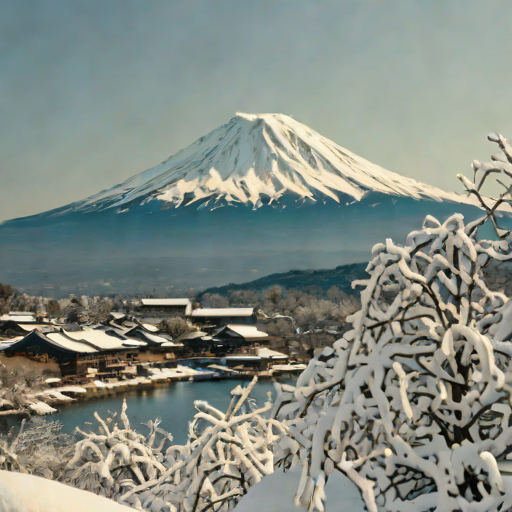

In [ ]:
from IPython.display import display
from diffusers import AutoPipelineForText2Image
import torch

pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16")
pipe.to("cuda")
prompt = "Mount Fuji covered in snow"
image = pipe(prompt=prompt, num_inference_steps=4, guidance_scale=0.0).images[0]
display(image)


In [16]:
 #Audio Generation
from IPython.display import Audio
from transformers import pipeline
from datasets import load_dataset
import soundfile as sf

synthesiser = pipeline("text-to-speech", "microsoft/speecht5_tts", device='cuda')
embeddings_dataset = load_dataset("matthijs/cmu-arctic-xvectors", split="validation",trust_remote_code=True)
speaker_embedding = torch.tensor(embeddings_dataset[7306]["xvector"]).unsqueeze(0)
speech = synthesiser("Hi to an artificial intelligence engineer, on the way to mastery!", forward_params={"speaker_embeddings": speaker_embedding})

# The output is a dictionary with 'audio' data
print(speech.keys())


Device set to use cuda


spkrec-xvect.zip:   0%|          | 0.00/17.9M [00:00<?, ?B/s]

Generating validation split: 0 examples [00:00, ? examples/s]

dict_keys(['audio', 'sampling_rate'])


In [6]:
Audio(speech["audio"], rate=speech["sampling_rate"])

In [14]:
# Restart the kernel

import IPython
IPython.Application.instance().kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

In [7]:
# browser reader for the blind
import requests
from bs4 import BeautifulSoup

def fetch_website_contents(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    # Extract visible text
    text = " ".join([p.get_text() for p in soup.find_all("p")])
    website=text[:1000]  # read first 1000 chars
    return website

In [8]:
# Define our system prompt - you can experiment with this later, changing the last sentence to 'Respond in markdown in Spanish."

system_prompt = """
You are an assistant  that analyzes the contents of a website,
and summarizes what you read into 3-5 bullet points.
"""

In [9]:
# Define our user prompt

user_prompt_prefix = """
Here are the contents of a website.
Provide a short summary of this website.
If it includes news or announcements, then summarize these too.

"""

In [10]:
def messages_for(site):
    return [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": user_prompt_prefix + site}
    ]

In [20]:
# Convert messages array into a dialogue string prompt = ""
messages=messages_for(fetch_website_contents("https://www.annefrank.org/en/museum/"))
messages

[{'role': 'system',
  'content': '\nYou are an assistant  that analyzes the contents of a website,\nand summarizes what you read into 3-5 bullet points.\n'},
 {'role': 'user',
  'content': '\nHere are the contents of a website.\nProvide a short summary of this website.\nIf it includes news or announcements, then summarize these too.\n\nWeâ\x80\x99re sorry, but we were unable to authorize your request. Please call us at 800-433-9196 and provide reference number SWAF-18.88a22717.1767977676.f7b6ba28. We apologize for any inconvenience. 0915-82LR'}]

In [21]:
model_id = "meta-llama/Llama-3.2-3B-Instruct"
# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_id, use_auth_token=True)
prompt = tokenizer.apply_chat_template(messages, tokenize=False)
prompt

/usr/local/lib/python3.12/dist-packages/transformers/models/auto/tokenization_auto.py:1010: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


'<|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\nCutting Knowledge Date: December 2023\nToday Date: 09 Jan 2026\n\nYou are an assistant  that analyzes the contents of a website,\nand summarizes what you read into 3-5 bullet points.<|eot_id|><|start_header_id|>user<|end_header_id|>\n\nHere are the contents of a website.\nProvide a short summary of this website.\nIf it includes news or announcements, then summarize these too.\n\nWeâ\x80\x99re sorry, but we were unable to authorize your request. Please call us at 800-433-9196 and provide reference number SWAF-18.88a22717.1767977676.f7b6ba28. We apologize for any inconvenience. 0915-82LR<|eot_id|>'

In [22]:
import torch

# Define quantization config
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float16
)

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_id, use_auth_token=True)

# Load model in 4-bit quantization
base_model = AutoModelForCausalLM.from_pretrained(
    model_id,
    device_map="auto",
    quantization_config=bnb_config,
    use_auth_token=True   # required for gated Llama models
)

# Generate text
inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
outputs = base_model.generate(**inputs, max_length=2000)
generated_tokens = outputs[0][inputs["input_ids"].shape[1]:]
generated_text = tokenizer.decode(generated_tokens, skip_special_tokens=True)

/usr/local/lib/python3.12/dist-packages/transformers/models/auto/auto_factory.py:492: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


In [14]:
generated_text

'assistant\n\nHere is a summary of the website in 3-5 bullet points:\n\n• The Anne Frank House is a museum in Amsterdam that tells the story of Anne Frank through various exhibits, including quotes, photos, videos, and original items. \n• Visitors can purchase tickets and plan their visit by checking the opening hours, admission fees, and location of the museum. \n• The museum offers various services, such as audio tours, a café, and a shop, as well as information on accessibility and conservation.'

In [18]:
# Generate audio from text

speech = synthesiser(generated_text, forward_params={"speaker_embeddings": speaker_embedding})


In [19]:
Audio(speech["audio"], rate=speech["sampling_rate"])